# Exploratory Data Analysis

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt # datetime operations
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore') 



# load Expired.csv 

In [30]:
# Load expired data csv
df1 = pd.read_csv('ExpiredMembers.csv', parse_dates=['AcctStart', 'AcctExpire', 'BirthDate'])
print(df1.shape)
df1.head()

(1157, 13)


,MbrID,AcctType,AcctStart,AcctExpire,ExecFlag,CreditCardFlag,AutoBillFlag,BirthDate,Gender,15_Shops,15_Spend,16_Shops,16_Spend
0,1243592710,1,2002-03-01,2016-03-01,NaN,NaN,NaN,1954-08-01,NaN,2.0,369.58,1.0,63.45
1,1545283250,1,2011-07-01,2016-07-01,NaN,NaN,NaN,1973-03-01,NaN,9.0,2205.18,8.0,2240.88
2,2475375080,1,2013-11-01,2015-11-01,NaN,NaN,NaN,1983-01-01,NaN,23.0,2334.16,5.0,403.52
3,2608194250,2,2008-01-01,2016-05-01,Y,NaN,NaN,1958-03-01,2.0,11.0,1808.86,2.0,341.02
4,6588597780,2,2000-06-01,2016-02-01,NaN,NaN,NaN,1968-09-01,NaN,5.0,1145.72,4.0,376.13


In [31]:
df1.dtypes

MbrID                      int64
AcctType                   int64
AcctStart         datetime64[ns]
AcctExpire        datetime64[ns]
ExecFlag                  object
CreditCardFlag            object
AutoBillFlag              object
BirthDate         datetime64[ns]
Gender                   float64
15_Shops                 float64
15_Spend                 float64
16_Shops                 float64
16_Spend                 float64
dtype: object

In [32]:
# histogram

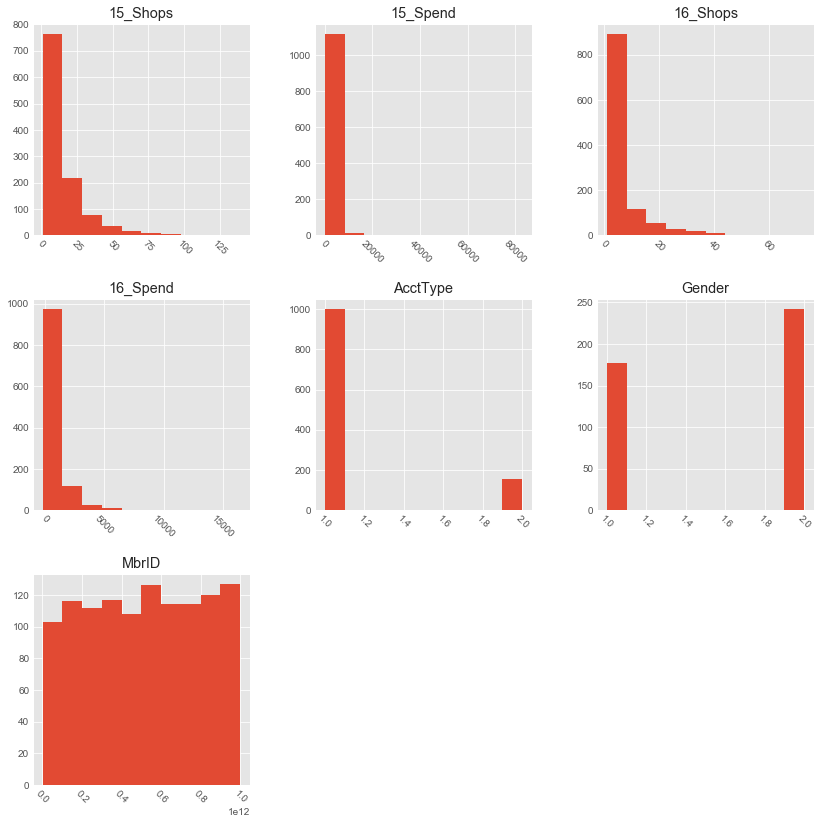

In [33]:
# Plot histogram grid
df1.hist(figsize=(14,14), xrot=-45)

# Clear the text "residue"
plt.show()

# Data cleaning and feature creation

In [34]:
#create new column for further analysis

df1['Duration'] = df1['AcctExpire'].sub(df1['AcctStart'], axis=0)
df1['Duration'] = df1['Duration'] / np.timedelta64(1, 'M')
df1.head()         

df1['Age'] = (df1['BirthDate'].sub(dt.date(2018,3,3))) * -1
df1['Age'] = df1['Age'] / np.timedelta64(1, 'Y')
df1['Age'] = df1.Age.round(3)
df1.head() 

,MbrID,AcctType,AcctStart,AcctExpire,ExecFlag,CreditCardFlag,AutoBillFlag,BirthDate,Gender,15_Shops,15_Spend,16_Shops,16_Spend,Duration,Age
0,1243592710,1,2002-03-01,2016-03-01,NaN,NaN,NaN,1954-08-01,NaN,2.0,369.58,1.0,63.45,168.019877,63.588
1,1545283250,1,2011-07-01,2016-07-01,NaN,NaN,NaN,1973-03-01,NaN,9.0,2205.18,8.0,2240.88,60.025873,45.006
2,2475375080,1,2013-11-01,2015-11-01,NaN,NaN,NaN,1983-01-01,NaN,23.0,2334.16,5.0,403.52,23.984065,35.168
3,2608194250,2,2008-01-01,2016-05-01,Y,NaN,NaN,1958-03-01,2.0,11.0,1808.86,2.0,341.02,99.977412,60.007
4,6588597780,2,2000-06-01,2016-02-01,NaN,NaN,NaN,1968-09-01,NaN,5.0,1145.72,4.0,376.13,188.028502,49.501


In [35]:
print("AcctType values = ", pd.unique(df1['AcctType']))
print("ExecFlag values = ", pd.unique(df1['ExecFlag']))
print("CreditCardFlag values = ", pd.unique(df1['CreditCardFlag']))
print("AutoBillFlag values = ", pd.unique(df1['AutoBillFlag']))
print("Gender values = ", pd.unique(df1['Gender']))



('AcctType values = ', array([1, 2], dtype=int64))
('ExecFlag values = ', array([nan, 'Y'], dtype=object))
('CreditCardFlag values = ', array([nan, 'Y'], dtype=object))
('AutoBillFlag values = ', array([nan, 'Y'], dtype=object))
('Gender values = ', array([ nan,   2.,   1.]))


In [36]:
#create missing flag variable
df1['GMiss'] = df1['Gender'].isnull().astype(int)

In [37]:
#get dummies for variables

df1 = pd.get_dummies(df1, columns=['Gender'])
df1.head()

,MbrID,AcctType,AcctStart,AcctExpire,ExecFlag,CreditCardFlag,AutoBillFlag,BirthDate,15_Shops,15_Spend,16_Shops,16_Spend,Duration,Age,GMiss,Gender_1.0,Gender_2.0
0,1243592710,1,2002-03-01,2016-03-01,NaN,NaN,NaN,1954-08-01,2.0,369.58,1.0,63.45,168.019877,63.588,1,0,0
1,1545283250,1,2011-07-01,2016-07-01,NaN,NaN,NaN,1973-03-01,9.0,2205.18,8.0,2240.88,60.025873,45.006,1,0,0
2,2475375080,1,2013-11-01,2015-11-01,NaN,NaN,NaN,1983-01-01,23.0,2334.16,5.0,403.52,23.984065,35.168,1,0,0
3,2608194250,2,2008-01-01,2016-05-01,Y,NaN,NaN,1958-03-01,11.0,1808.86,2.0,341.02,99.977412,60.007,0,0,1
4,6588597780,2,2000-06-01,2016-02-01,NaN,NaN,NaN,1968-09-01,5.0,1145.72,4.0,376.13,188.028502,49.501,1,0,0


In [38]:
# fix structral errors 

df1.AcctType = df1.AcctType.eq(2).mul(1)

df1.ExecFlag.fillna(0, inplace=True)
df1.ExecFlag = df1.ExecFlag.eq('Y').mul(1)

df1.CreditCardFlag.fillna(0, inplace=True)
df1.CreditCardFlag = df1.CreditCardFlag.eq('Y').mul(1)

df1.AutoBillFlag.fillna(0, inplace=True)
df1.AutoBillFlag = df1.AutoBillFlag.eq('Y').mul(1)
df1.head()

print("AcctType values = ", pd.unique(df1['AcctType']))
print("ExecFlag values = ", pd.unique(df1['ExecFlag']))
print("CreditCardFlag values = ", pd.unique(df1['CreditCardFlag']))
print("AutoBillFlag values = ", pd.unique(df1['AutoBillFlag']))


('AcctType values = ', array([0, 1], dtype=int64))
('ExecFlag values = ', array([0, 1], dtype=int64))
('CreditCardFlag values = ', array([0, 1], dtype=int64))
('AutoBillFlag values = ', array([0, 1], dtype=int64))


# Visualization

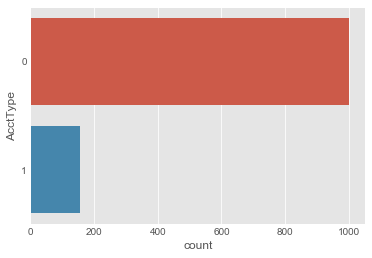

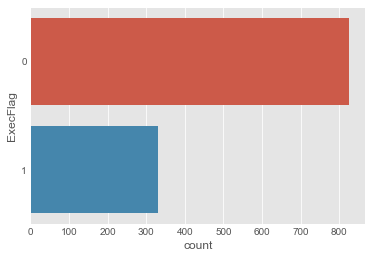

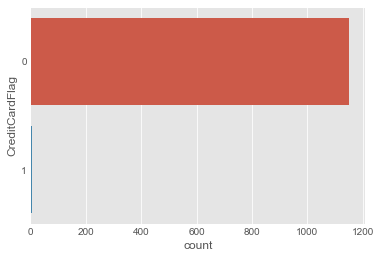

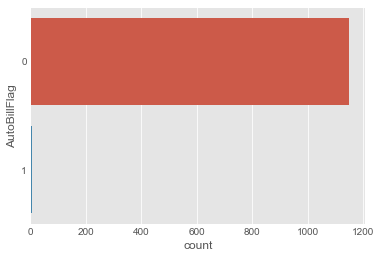

In [39]:
# Plot bar plot for each categorical feature
for feature in ['AcctType', 'ExecFlag', 'CreditCardFlag', 'AutoBillFlag']:
    sns.countplot(y=feature, data=df1)
    plt.show()

In [40]:
df1.shape

(1157, 17)

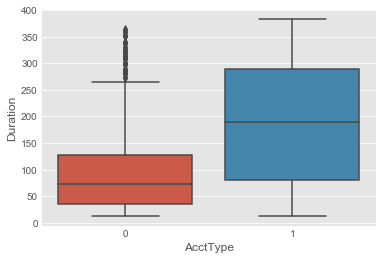

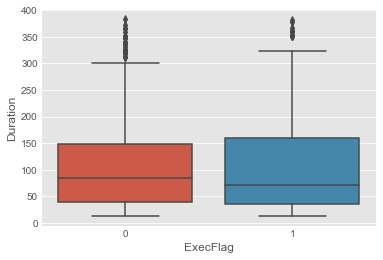

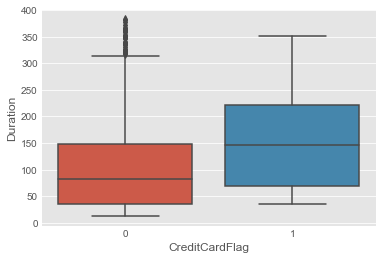

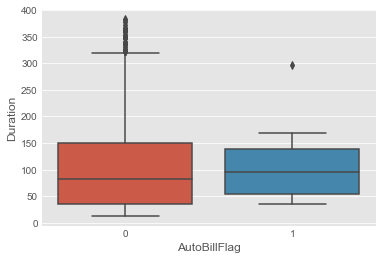

In [41]:
#Effect of account type
for feature in ['AcctType', 'ExecFlag', 'CreditCardFlag', 'AutoBillFlag']:
    sns.boxplot(y='Duration', x=feature, data=df1)
    plt.show()


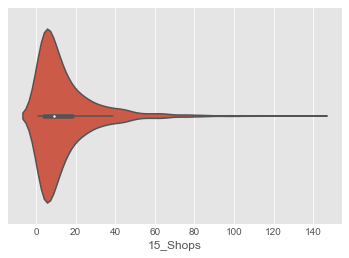

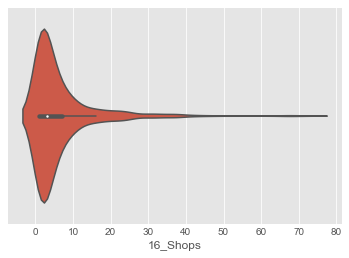

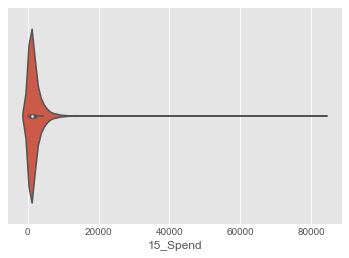

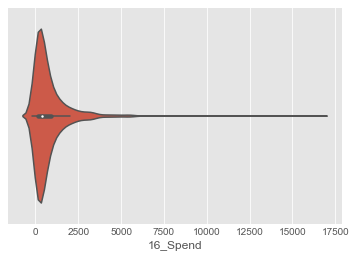

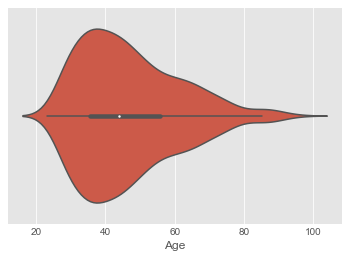

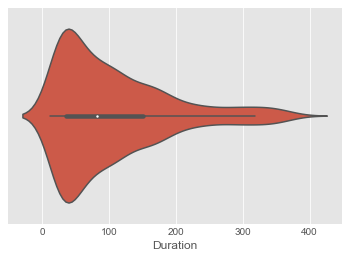

('Rich people-15:', (6, 17))
('Rich people-16:', (2, 17))
('Hoppers-15:', (42, 17))
('Hoppers-16:', (8, 17))
('Old people:', (50, 17))
('Loyal customer:', (58, 17))


In [42]:
# Plot bar plot for each categorical feature
for feature in ['15_Shops', '16_Shops', '15_Spend', '16_Spend','Age', 'Duration']:
    sns.violinplot(df1[feature])
    plt.show()

# Trip duration equal to zero
print("Rich people-15:", df1[df1['15_Spend'] > 10000].shape)
print("Rich people-16:", df1[df1['16_Spend'] > 10000].shape)

print("Hoppers-15:", df1[df1['15_Shops'] > 50].shape)
print("Hoppers-16:", df1[df1['16_Shops'] > 50].shape)

# Less than zero trip duration
print("Old people:", df1[df1['Age'] > 75].shape)

# Trip duration equal to zero
print("Loyal customer:", df1[df1['Duration'] > 300].shape)

# correlation heatmap

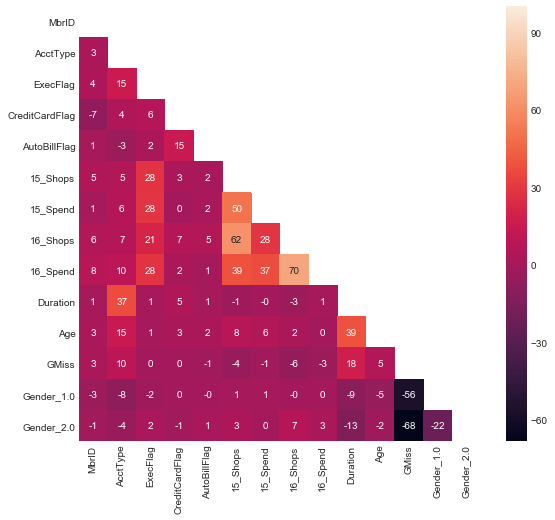

In [43]:
correlations = df1.corr()

# Change color scheme
sns.set_style("white")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Make the figsize 9 x 8
plt.figure(figsize=(9,8))

# Plot heatmap of correlations
sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask)

In [44]:
df1 = df1.dropna()
df1.head()

,MbrID,AcctType,AcctStart,AcctExpire,ExecFlag,CreditCardFlag,AutoBillFlag,BirthDate,15_Shops,15_Spend,16_Shops,16_Spend,Duration,Age,GMiss,Gender_1.0,Gender_2.0
0,1243592710,0,2002-03-01,2016-03-01,0,0,0,1954-08-01,2.0,369.58,1.0,63.45,168.019877,63.588,1,0,0
1,1545283250,0,2011-07-01,2016-07-01,0,0,0,1973-03-01,9.0,2205.18,8.0,2240.88,60.025873,45.006,1,0,0
2,2475375080,0,2013-11-01,2015-11-01,0,0,0,1983-01-01,23.0,2334.16,5.0,403.52,23.984065,35.168,1,0,0
3,2608194250,1,2008-01-01,2016-05-01,1,0,0,1958-03-01,11.0,1808.86,2.0,341.02,99.977412,60.007,0,0,1
4,6588597780,1,2000-06-01,2016-02-01,0,0,0,1968-09-01,5.0,1145.72,4.0,376.13,188.028502,49.501,1,0,0


In [45]:
# drop unwanted variables
dataset = df1.drop([ 'MbrID', 'AcctStart','AcctExpire', 'BirthDate'], axis=1, inplace=False)
dataset.head()

,AcctType,ExecFlag,CreditCardFlag,AutoBillFlag,15_Shops,15_Spend,16_Shops,16_Spend,Duration,Age,GMiss,Gender_1.0,Gender_2.0
0,0,0,0,0,2.0,369.58,1.0,63.45,168.019877,63.588,1,0,0
1,0,0,0,0,9.0,2205.18,8.0,2240.88,60.025873,45.006,1,0,0
2,0,0,0,0,23.0,2334.16,5.0,403.52,23.984065,35.168,1,0,0
3,1,1,0,0,11.0,1808.86,2.0,341.02,99.977412,60.007,0,0,1
4,1,0,0,0,5.0,1145.72,4.0,376.13,188.028502,49.501,1,0,0


In [46]:
dataset.to_csv('train.csv', index=None)

In [47]:
dataset.shape

(1018, 13)